In [33]:
# Problem statement
# Important factors
# Business understanding of overall end to end process

# Sample demo of EDA

In [ ]:
# Need to analyse the pattern in dataset
# Categorical vs Caterical - stats bar chart/stats column chart
# Categorical vs Numerical - Box plot
# Numerical vs Numerical - Line chart, scattered plot
# Heatmaps - famous in displaying correlation with strength

In [ ]:
# loan_amnt = Applied loan amount by borrower
# funded_amnt = Approved by the approver
# funded_amnt_inv = Actual amount given by the invester to borrower

# Data understanding
# Data cleaning (cleaning missing values, removing redundant columns etc.)
# Data Analysis - EDA - Univariate (Histogram), Bivariate (Cat vs Cat, Cat vs Num, Num vs Num), Multivariate (Correlation e.g. heatmaps)
# Recommendations

In [ ]:
# Data Cleaning
# 1. Check the percentage of missing values
# 2. Remove all those with very high missing percentage
# 3. For columns with less missing percentage: perform imputations
#         - You don't need to impute the data, you can just identify the correct metric (Mean, Median, Mode) to impute the column (K-NN -> Imputation)
# 4. You can drop rows where the missing percentage is quite high

In [ ]:
# Data Analysis

# There are broadly three types of variables -
# 1. those which are related to the applicate (demographic variables such as age, occupation, employment details etc.)
# 2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.) and
# 3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.)

# Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval
# The ones marked 'current' are neither fully paid not defaulted, so get rid of the current loans. Also, tag the other two values as 0 or 1 to make your analysis simple and clean

In [ ]:
# Skew on dataframe
# https://www.geeksforgeeks.org/python-pandas-dataframe-skew/

In [ ]:
# Few Important Variables
# Loan_amt, Term, Interest_rate, 

In [ ]:
# PLotly - interactive plotting

In [ ]:
# Binning - categorising the data like age in age group
# Violin plot - like box plot only

In [ ]:
# https://drive.google.com/drive/folders/1GaKpbT7iztHUUk0MQHfj-p78Eb-H_PeD?usp=sharing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('loan/loan.csv', header=0)
# Describe whole dataset
df.head()

C:\Users\Aniruddha\AppData\Local\Temp\ipykernel_21180\2375939763.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('loan/loan.csv', header=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(39717, 111)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
print(df.isnull().all(axis=1).sum())

0


In [7]:
print(df.iloc[:,50].isnull().all(axis=0).sum())
print(df.iloc[:,51].isnull().all(axis=0).sum())
print(df.iloc[:,52].isnull().all(axis=0).sum())
print(df.iloc[:,53].isnull().all(axis=0).sum())
print(df.iloc[:,90].isnull().all(axis=0).sum())
print(df.iloc[:,80:100].isnull().all(axis=0).sum())

1
0
0
1
1
20


In [8]:
df.drop(df.iloc[:,80:100], inplace=True, axis=1)
df.drop(df.iloc[:,57:78], inplace=True, axis=1)
df.drop(df.iloc[:,53:56], inplace=True, axis=1)
df.drop(df.iloc[:,50:51], inplace=True, axis=1)

In [9]:
print(df.iloc[:,55:60].isnull().all(axis=0).sum())
print(df.iloc[:,60:61].isnull().all(axis=0).sum())
print(df.iloc[:,57:60].isnull().all(axis=0).sum())
print(df.desc.isnull().sum())
print(df.emp_title.isnull().sum())
print(df.mths_since_last_record.isnull().sum())

5
0
3
12940
2459
36931


In [10]:
df.drop(df.iloc[:,55:60], inplace=True, axis=1)
df.drop(df.iloc[:,60:61], inplace=True, axis=1)
df.drop(df.iloc[:,57:60], inplace=True, axis=1)
df.drop(['desc'], inplace=True, axis=1)
df.drop(['emp_title'], inplace=True, axis=1)
df.drop(['mths_since_last_record'], inplace=True, axis=1)
df.drop(['tax_liens', 'pub_rec_bankruptcies', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'collections_12_mths_ex_med', 'last_credit_pull_d', 
         'next_pymnt_d', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collection_recovery_fee',
        'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type', 'policy_code', 'pymnt_plan', 'installment', 'initial_list_status'], inplace=True, axis=1)

In [11]:
df.isnull().all(axis=0).sum()

0

In [12]:
df.emp_length.fillna('0',inplace=True)

In [13]:
def remove_characters(x):
    return ''.join(filter(str.isdigit, str(x)))

df.emp_length = df.emp_length.apply(lambda x : remove_characters(x))

In [14]:
df.int_rate = df.int_rate.apply(lambda x: x.replace('%', '')).astype('float')

In [15]:
df.term = df.term.apply(lambda x: x.replace('months', '')).astype('int')

In [16]:
df.shape

(39717, 33)

In [17]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,...,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt
0,1077501,1296599,5000,5000,4975.0,36,10.65,B,B2,10,...,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187
1,1077430,1314167,2500,2500,2500.0,60,15.27,C,C4,1,...,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000
2,1077175,1313524,2400,2400,2400.0,36,15.96,C,C5,10,...,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844
3,1076863,1277178,10000,10000,10000.0,36,13.49,C,C1,10,...,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000
4,1075358,1311748,3000,3000,3000.0,60,12.69,B,B5,1,...,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000


In [18]:
df_not_current = df[df.loan_status != 'Current']
df_not_current.shape

(38577, 33)

In [19]:
def convert_loan_status_to_int(x):
    if x == "Fully Paid":
        return 1
    else:
        return 0
    
df_not_current['loan_status_int'] = df_not_current['loan_status'].apply(lambda x: convert_loan_status_to_int(x))

C:\Users\Aniruddha\AppData\Local\Temp\ipykernel_21180\3452782461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_current['loan_status_int'] = df_not_current['loan_status'].apply(lambda x: convert_loan_status_to_int(x))


In [20]:
df_not_current.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,...,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,loan_status_int
0,1077501,1296599,5000,5000,4975.0,36,10.65,B,B2,10,...,NaN,3,0,13648,83.70%,9,0.0,0.0,5863.155187,1
1,1077430,1314167,2500,2500,2500.0,60,15.27,C,C4,1,...,NaN,3,0,1687,9.40%,4,0.0,0.0,1008.710000,0
2,1077175,1313524,2400,2400,2400.0,36,15.96,C,C5,10,...,NaN,2,0,2956,98.50%,10,0.0,0.0,3005.666844,1
3,1076863,1277178,10000,10000,10000.0,36,13.49,C,C1,10,...,35.0,10,0,5598,21%,37,0.0,0.0,12231.890000,1
5,1075269,1311441,5000,5000,5000.0,36,7.90,A,A4,3,...,NaN,9,0,7963,28.30%,12,0.0,0.0,5632.210000,1


In [21]:
df_not_current.isna().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
url                           0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    24905
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prnc

In [22]:
df_not_current.drop(['mths_since_last_delinq'], inplace=True, axis = 1)

C:\Users\Aniruddha\AppData\Local\Temp\ipykernel_21180\2284896794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_current.drop(['mths_since_last_delinq'], inplace=True, axis = 1)


In [26]:
sub_grade_count = df_not_current.pivot_table(index = 'sub_grade', values = 'loan_status', aggfunc = {'sub_grade': 'count'})
loan_status_grade_count = df_not_current.pivot_table(index = ['sub_grade', 'loan_status'], aggfunc = {'sub_grade': 'count'})
laon_status_grade_percent = round(loan_status_grade_count * 100 / sub_grade_count, 2)
laon_status_grade_percent.unstack()

# Borrowers who have taken loan with Grade beyond D2 tend do Default more than others
# Borrowers who have taken loan with Grade A or B tend to pay off the loan more than others

sub_grade           
loan_status Charged Off Fully Paid
sub_grade                         
A1                 2.63      97.37
A2                 4.91      95.09
A3                 5.69      94.31
A4                 6.20      93.80
A5                 7.99      92.01
B1                 9.52      90.48
B2                11.39      88.61
B3                12.07      87.93
B4                13.50      86.50
B5                13.61      86.39
C1                16.35      83.65
C2                16.62      83.38
C3                18.15      81.85
C4                17.58      82.42
C5                18.02      81.98
D1                17.94      82.06
D2                21.07      78.93
D3                22.94      77.06
D4                23.42      76.58
D5                25.06      74.94
E1                27.42      72.58
E2                26.55      73.45
E3                23.06      76.94
E4                29.72      70.28
E5                28.17      71.83
F1                29.84      70.16
F2                30.04      69.96
F3                29.31      70.69
F4                35.10      64.90
F5                47.79      52.21
G1                32.98      67.02
G2                36.36      63.64
G3                42.22      57.78
G4                24.07      75.93
G5                34.48      65.52

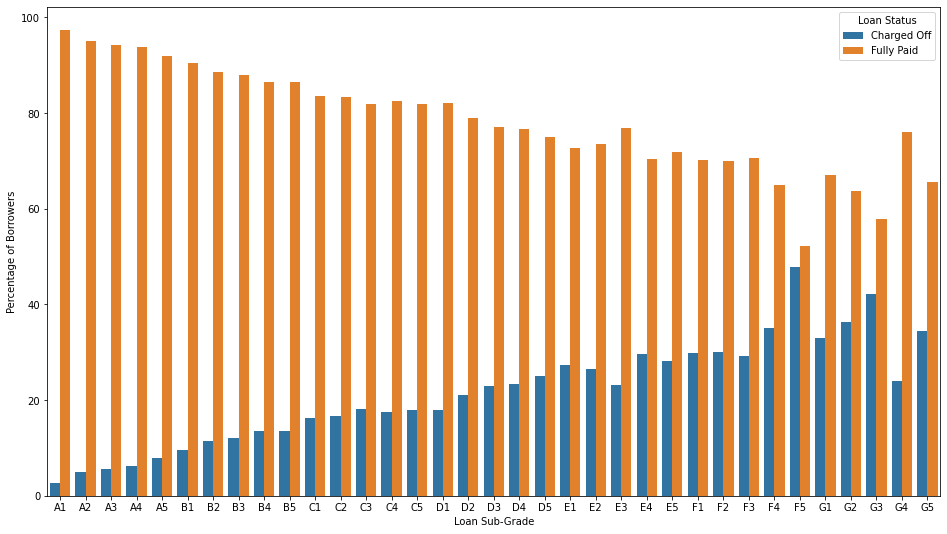

In [28]:
laon_status_grade_percent.rename({'sub_grade':'grade'}, axis='columns', inplace = True)
laon_status_grade_percent.reset_index(inplace = True)

plt.figure(figsize = (16, 9))

grade_subgrade_plot = sns.barplot(x = 'sub_grade', y = 'grade', hue = 'loan_status', data = laon_status_grade_percent)
plt.xlabel("Loan Sub-Grade")
plt.ylabel("Percentage of Borrowers")
plt.legend(title = "Loan Status")

plt.show()

In [84]:
df_not_current.home_ownership.value_counts()*100/len(df_not_current)

RENT        48.464408
MORTGAGE    43.541518
OWN          7.734836
OTHER        0.251303
NONE         0.007936
Name: home_ownership, dtype: float64

C:\Users\Aniruddha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

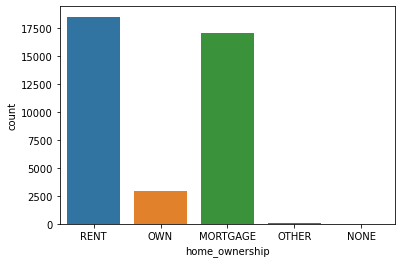

In [56]:
sns.countplot(df_not_current.home_ownership)

C:\Users\Aniruddha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='annual_inc'>

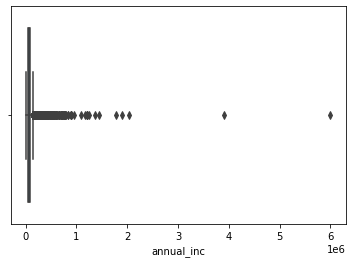

In [57]:
sns.boxplot(df_not_current.annual_inc)

In [58]:
quantiles = df_not_current.annual_inc.quantile([0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1])
quantiles

0.05      24000.00
0.10      30000.00
0.15      34000.00
0.20      37196.16
0.25      40000.00
0.30      44500.00
0.35      48000.00
0.40      50004.00
0.45      54908.80
0.50      58868.00
0.55      61400.00
0.60      65004.00
0.65      70200.00
0.70      75000.00
0.75      82000.00
0.80      90000.00
0.85     100000.00
0.90     115000.00
0.95     140004.00
0.96     150000.00
0.97     165000.00
0.98     187000.00
0.99     234144.00
1.00    6000000.00
Name: annual_inc, dtype: float64

In [59]:
df_not_current = df_not_current[df_not_current.annual_inc < df_not_current.annual_inc.quantile(0.98)]

C:\Users\Aniruddha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

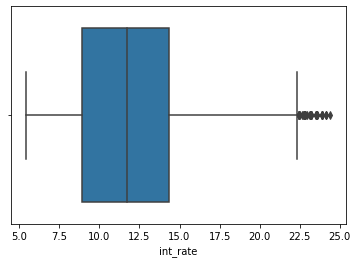

In [60]:
sns.boxplot(df_not_current.int_rate)
# Values are continuous, so no need to remove anything

C:\Users\Aniruddha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

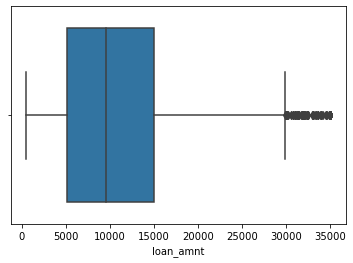

In [61]:
sns.boxplot(df_not_current.loan_amnt)
# Values are continuous, so no need to remove anything

In [64]:
df_not_current[['int_rate', 'term']].corr()

,int_rate,term
int_rate,1.000000,0.438309
term,0.438309,1.000000


<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

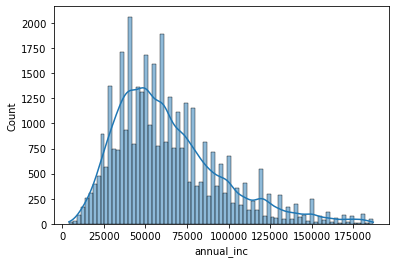

In [73]:
sns.histplot(df_not_current.annual_inc, kde=True)

In [65]:
def get_annual_income_groups(x):
    if x > 0 and x <= 10000:
        return "0 to 10000" 
    elif x > 10000 and x <= 20000:
        return "10000 to 20000"
    elif x > 20000 and x <= 30000:
        return "20000 to 30000"
    elif x > 30000 and x <= 40000:
        return "30000 to 40000"
    elif x > 40000 and x <= 50000:
        return "40000 to 50000"
    elif x > 50000 and x <= 60000:
        return "50000 to 60000"
    elif x > 60000 and x <= 70000:
        return "60000 to 70000"
    elif x > 70000 and x <= 80000:
        return "70000 to 80000"
    elif x > 80000 and x <= 90000:
        return "80000 to 90000"
    elif x > 90000 and x <= 100000:
        return "90000 to 100000"
    elif x > 100000:
        return "100000 and above"

df_not_current['annual_inc_groups'] = df_not_current.annual_inc.apply(lambda x: get_annual_income_groups(x))

df_annual_inc = df_not_current.loc[:,['annual_inc', 'loan_status']]

# Add the income level labels to the dataframe and get the count of it in each loan status type
df_annual_inc['inc_group'] = pd.cut(df_annual_inc.annual_inc, bins = list(df_not_current.annual_inc.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])))
df_annual_inc = df_annual_inc.loc[:, ['inc_group','loan_status']]
df_annual_inc = df_annual_inc.groupby(['inc_group', 'loan_status']).size()
df_annual_inc

inc_group             loan_status
(30000.0, 37000.0]    Charged Off     573
                      Fully Paid     2574
(37000.0, 44000.0]    Charged Off     610
                      Fully Paid     3155
(44000.0, 50000.0]    Charged Off     591
                      Fully Paid     3335
(50000.0, 57600.0]    Charged Off     527
                      Fully Paid     3005
(57600.0, 65000.0]    Charged Off     629
                      Fully Paid     3539
(65000.0, 75000.0]    Charged Off     530
                      Fully Paid     3438
(75000.0, 87000.0]    Charged Off     406
                      Fully Paid     2785
(87000.0, 110000.0]   Charged Off     458
                      Fully Paid     3620
(110000.0, 186996.0]  Charged Off     385
                      Fully Paid     3092
dtype: int64

In [66]:
annual_income_group = []
for i in df_annual_inc.reset_index().groupby('inc_group').sum()[0]:
    annual_income_group.append(i)
    annual_income_group.append(i)
annual_income_group

percent_income = round(100*(df_annual_inc)/annual_income_group, 2).reset_index()
percent_income['percent'] = percent_income[0]
percent_income = percent_income.drop(0, axis=1)
percent_income

,inc_group,loan_status,percent
0,"(30000.0, 37000.0]",Charged Off,18.21
1,"(30000.0, 37000.0]",Fully Paid,81.79
2,"(37000.0, 44000.0]",Charged Off,16.20
3,"(37000.0, 44000.0]",Fully Paid,83.80
4,"(44000.0, 50000.0]",Charged Off,15.05
5,"(44000.0, 50000.0]",Fully Paid,84.95
6,"(50000.0, 57600.0]",Charged Off,14.92
7,"(50000.0, 57600.0]",Fully Paid,85.08
8,"(57600.0, 65000.0]",Charged Off,15.09
9,"(57600.0, 65000.0]",Fully Paid,84.91


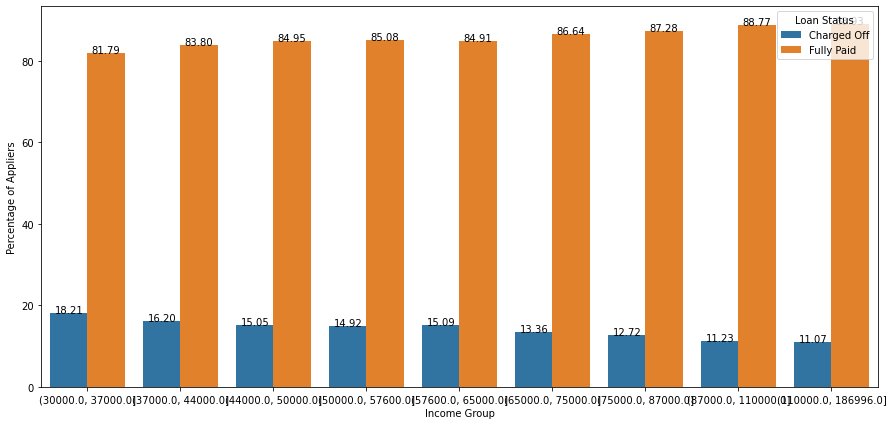

In [67]:
plt.figure(figsize=(15,7))

ax = sns.barplot(y='percent', x='inc_group', hue='loan_status', data=percent_income)
# Get values of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, '{:1.2f}'.format(height), ha="center") 
    
plt.xlabel("Income Group")
plt.ylabel("Percentage of Appliers")
plt.legend(title = "Loan Status")

plt.show()

# Borrowers with annual income < 55,000 USD (L5 Level) tend to default and those with > 65,000 USD (L6 income level) tend to pay

In [68]:
df_not_current.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,loan_status_int,annual_inc_groups
0,1077501,1296599,5000,5000,4975.0,36,10.65,B,B2,10,...,3,0,13648,83.70%,9,0.0,0.0,5863.155187,1,20000 to 30000
1,1077430,1314167,2500,2500,2500.0,60,15.27,C,C4,1,...,3,0,1687,9.40%,4,0.0,0.0,1008.710000,0,20000 to 30000
2,1077175,1313524,2400,2400,2400.0,36,15.96,C,C5,10,...,2,0,2956,98.50%,10,0.0,0.0,3005.666844,1,10000 to 20000
3,1076863,1277178,10000,10000,10000.0,36,13.49,C,C1,10,...,10,0,5598,21%,37,0.0,0.0,12231.890000,1,40000 to 50000
5,1075269,1311441,5000,5000,5000.0,36,7.90,A,A4,3,...,9,0,7963,28.30%,12,0.0,0.0,5632.210000,1,30000 to 40000


<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

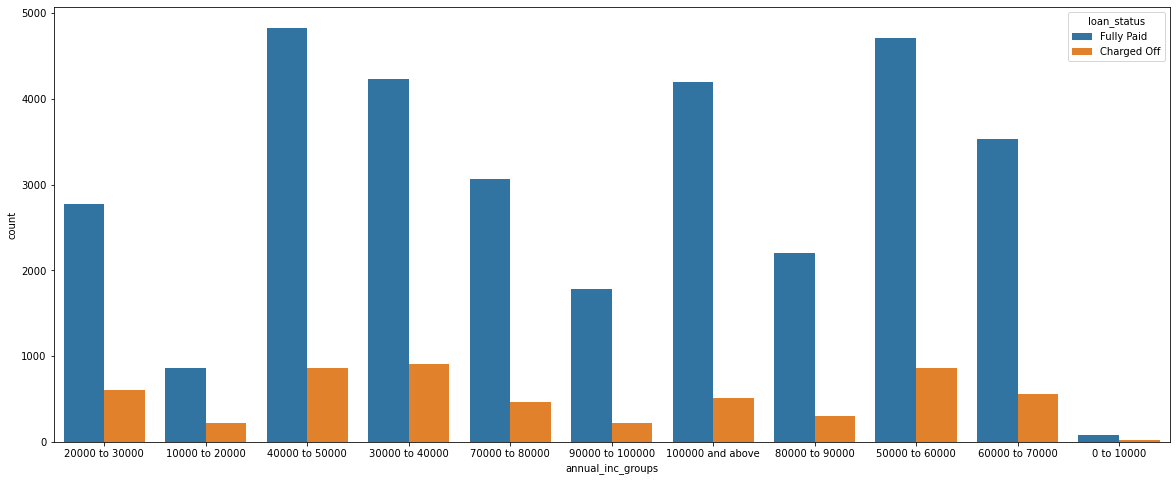

In [69]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df_not_current, x=df_not_current.annual_inc_groups, hue="loan_status")

In [72]:
quantiles = df_not_current.loan_amnt.quantile([0.05, 0.1, 0.15, 0.20, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.60, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 1])
quantiles

0.05     2400.0
0.10     3000.0
0.15     4000.0
0.20     5000.0
0.25     5100.0
0.30     6000.0
0.35     7000.0
0.40     7500.0
0.45     8000.0
0.50     9600.0
0.55    10000.0
0.60    11000.0
0.65    12000.0
0.70    13200.0
0.75    15000.0
0.80    16000.0
0.85    19000.0
0.90    21000.0
0.95    25000.0
0.96    25000.0
0.97    27575.0
0.98    30000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [71]:
loan_amnt_groups = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000]
loan_amnt_labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000', '30000-35000']

loan_amnt_df = df_not_current.loc[:,['loan_amnt', 'loan_status']]

# Add the loan amount level labels to the dataframe and get the count of it in each loan status type
loan_amnt_df['loan_level'] = pd.cut(loan_amnt_df.loan_amnt, bins=loan_amnt_groups, labels =loan_amnt_labels)
loan_amnt_df = loan_amnt_df.loc[:, ['loan_level','loan_status']]
loan_amnt_df = loan_amnt_df.groupby(['loan_level', 'loan_status']).size()
loan_amnt_df

loan_level   loan_status
0-5000       Charged Off     1309
             Fully Paid      8100
5000-10000   Charged Off     1631
             Fully Paid     11044
10000-15000  Charged Off     1047
             Fully Paid      6504
15000-20000  Charged Off      737
             Fully Paid      3489
20000-25000  Charged Off      518
             Fully Paid      2139
25000-30000  Charged Off      137
             Fully Paid       510
30000-35000  Charged Off      169
             Fully Paid       469
dtype: int64

In [51]:
loan_a_count = []
for i in loan_amnt_df.reset_index().groupby('loan_level').sum()[0]:
    loan_a_count.append(i)
    loan_a_count.append(i)
loan_a_count

amnt_percentage = round(100*(loan_amnt_df)/loan_a_count, 2).reset_index()
amnt_percentage['percent'] = amnt_percentage[0]
amnt_percentage = amnt_percentage.drop(0, axis=1)
amnt_percentage

,loan_level,loan_status,percent
0,0-5000,Charged Off,13.87
1,0-5000,Fully Paid,86.13
2,5000-10000,Charged Off,12.83
3,5000-10000,Fully Paid,87.17
4,10000-15000,Charged Off,13.73
5,10000-15000,Fully Paid,86.27
6,15000-20000,Charged Off,17.27
7,15000-20000,Fully Paid,82.73
8,20000-25000,Charged Off,19.11
9,20000-25000,Fully Paid,80.89


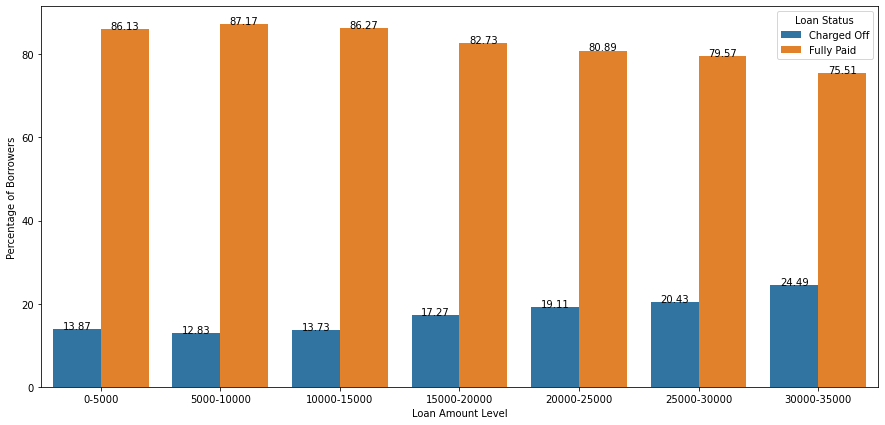

In [52]:
plt.figure(figsize=(15,7))

axes = sns.barplot(y='percent', x='loan_level', hue='loan_status', data=amnt_percentage)
for patch in axes.patches:
    height = patch.get_height()
    axes.text(patch.get_x()+patch.get_width()/2., height, '{:1.2f}'.format(height), ha="center") 
    
plt.xlabel("Loan Amount Range")
plt.ylabel("Percentage of Appliers")
plt.legend(title = "Loan Status")

plt.show()

# Borrowers with loan amount > 15,000 USD tend to default, those with < 15,000 USD tend to pay

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

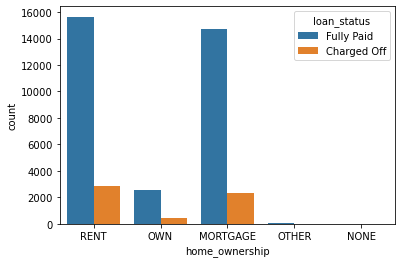

In [67]:
sns.countplot(data=df_not_current, x=df_not_current.home_ownership, hue="loan_status")

In [57]:
df_home_ownership = df_not_current.loc[df_not_current['home_ownership'] != 'NONE']
df_home_ownership['home_ownership'] = df_home_ownership['home_ownership'].astype('category').cat.remove_unused_categories()

# Get percentage of Loan Status in each of the home ownership type
home_own_count = df_home_ownership.pivot_table(index = 'home_ownership', values = 'loan_status', aggfunc = {'home_ownership': 'count'})    
loan_status_home_count = df_home_ownership.pivot_table(index = ['home_ownership', 'loan_status'], aggfunc = {'home_ownership': 'count'})
loan_status_home_percent = round(loan_status_home_count * 100 / home_own_count, 2)

# Select top categories which have Fully Paid
top_paid = list(loan_status_home_percent.iloc[np.arange(1, len(loan_status_home_percent), 2),0])
top_paid.sort(reverse = True)

# Select top categories which have resulted in Charged-Off
top_choff = list(loan_status_home_percent.iloc[np.arange(0, len(loan_status_home_percent), 2),0])
top_choff.sort(reverse = True)

loan_status_home_percent

# Borrowers with Rented Houses or Other as Home Ownership status tend do Default more than others
# Borrowers with Mortgaged House or living in Own Hosue tend to pay off the loan more than others

C:\Users\Aniruddha\AppData\Local\Temp\ipykernel_27612\1542182181.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_home_ownership['home_ownership'] = df_home_ownership['home_ownership'].astype('category').cat.remove_unused_categories()


home_ownership
home_ownership loan_status                
MORTGAGE       Charged Off           13.67
               Fully Paid            86.33
OTHER          Charged Off           18.37
               Fully Paid            81.63
OWN            Charged Off           14.89
               Fully Paid            85.11
RENT           Charged Off           15.36
               Fully Paid            84.64

In [ ]:
purpose_count = df_not_current.pivot_table(index = 'purpose', values = 'loan_status', aggfunc = {'purpose': 'count'})    
loan_status_purp_count = df_not_current.pivot_table(index = ['purpose', 'loan_status'], aggfunc = {'purpose': 'count'})
loan_status_purp_pcnt = loan_status_purp_count * 100 / purpose_count

# Select top categories which have Fully Paid
top_paid = list(loan_status_purp_pcnt.iloc[np.arange(1, len(loan_status_purp_pcnt), 2),0])
top_paid.sort(reverse = True)

# Select top categories which have resulted in Charged-Off
top_choff = list(loan_status_purp_pcnt.iloc[np.arange(0, len(loan_status_purp_pcnt), 2),0])
top_choff.sort(reverse = True)

loan_status_purp_pcnt_sty = loan_status_purp_pcnt.style.applymap(highlighter_top2).format({'purpose':'{0:,.2f}%'})
loan_status_purp_pcnt_sty